In [22]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [9]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [14]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
x_train , x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12348\718055844.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


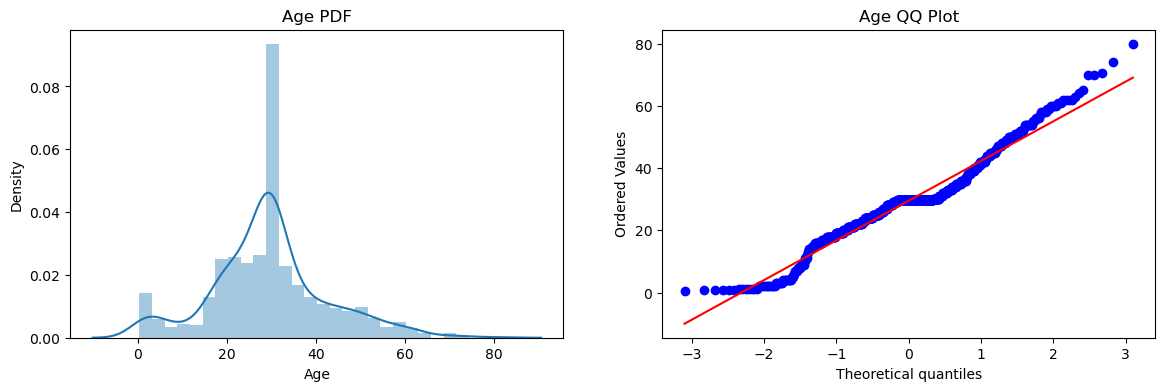

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Mrunmay\AppData\Local\Temp\ipykernel_12348\1798982542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


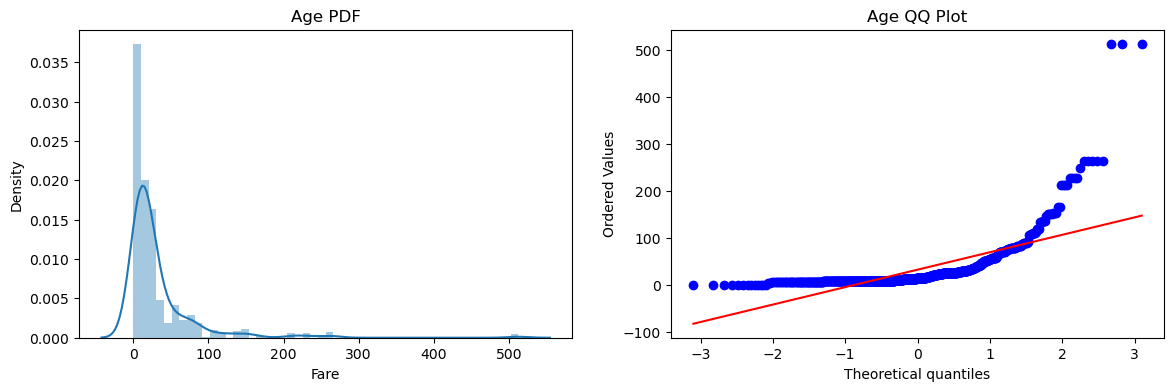

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

### ACCURACY BEFORE LOG TRANSFORMATION 

In [36]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [40]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
    
y_pred = clf1.predict(x_test)
y_pred1 = clf2.predict(x_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


### APPLYING LOG TRANSFORMER

In [41]:
trf = FunctionTransformer(func=np.log1p)

In [48]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

### ACCURACY AFTER TRANSFORMATION

In [54]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
    
y_pred = clf1.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


### NOTE HERE :
        no change on desicion tree but 5 percent change in linear regression model


In [55]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))


LR 0.678027465667915
DT 0.6644569288389515


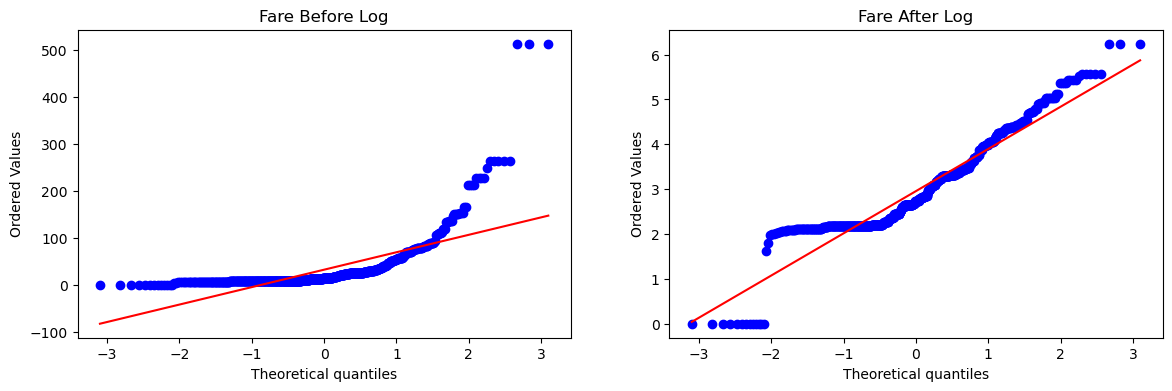

In [56]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

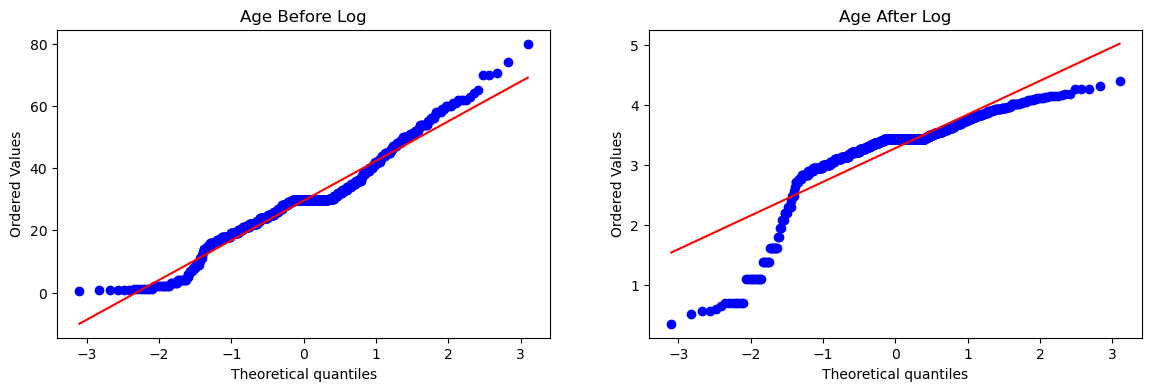

In [58]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()           

In [60]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train)
X_test_transformed2 = trf2.transform(x_test)

In [61]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [63]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599875156054931


In [64]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.616167290886392


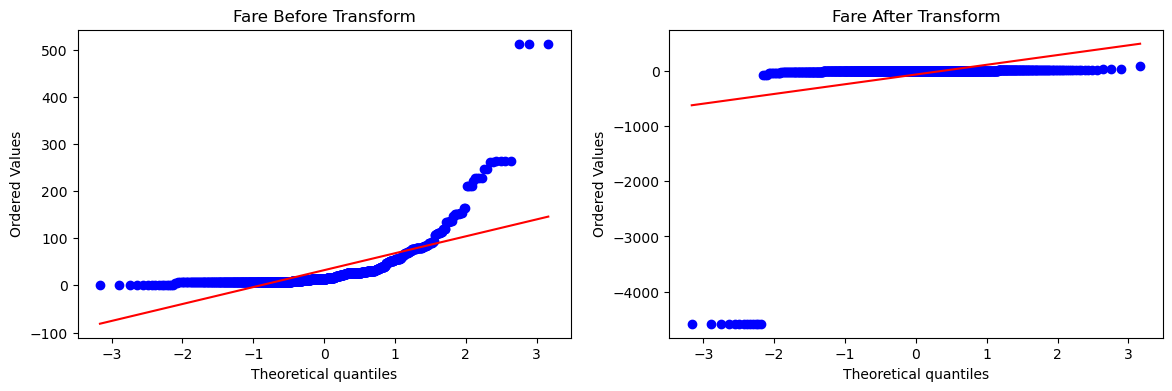

In [71]:
apply_transform(np.tan)

Accuracy 0.616167290886392


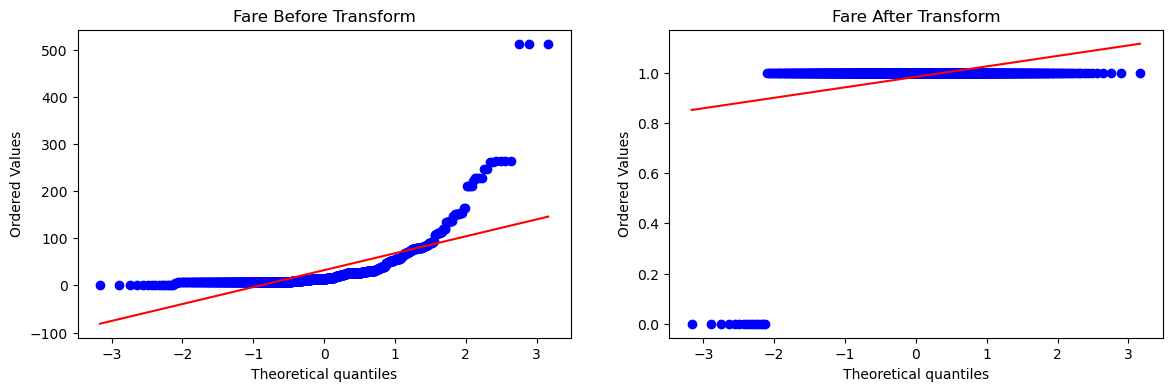

In [68]:
apply_transform(lambda x : x**1/(x+0.00001))